In [1]:
import sys
sys.path.append('../src')

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import tensorflow as tf

In [3]:
from gait.config import pd
from gait.utils import get_data_by_overlap_percent,get_overlap_data_all_sessions,  split_test_train_by_subjects, remove_invalid_data, get_overlap_data_all_sessions
from gait.training import train_model_with_stats
from gait.evalution import save_history, save_test_history, save_accuracy_loss_figure, save_confusion_matrix_figure, compute_validations_predictions,compute_validations_predictions_with_stats


In [4]:
def compute_resultant_acceleration(X):
    return np.sqrt(X[:,:,0] **2 + X[:,:,1] ** 2 + X[:,:,2] ** 2)

def compute_resultant_gyro(X):
    return np.sqrt(X[:,:,3] **2 + X[:,:,4] ** 2 + X[:,:,5] ** 2)

def compute_resultant_angle(X):
    return np.sqrt(X[:,:,6] **2 + X[:,:,7] ** 2 + X[:,:,8] ** 2)

In [5]:
def get_std_values(X, channel):
    return X[:, :, channel].std(axis=1)


def get_mean_values(X, channel):
    return X[:, :, channel].mean(axis=1)


def get_max_values(X, channel):
    return X[:, :, channel].max(axis=1)


def get_statistic_feature_all_channels(X):
    statistic_features = []
    print(X_train.shape)
    for channel in range(9,12):
        value = get_std_values(X, channel)
        print('value shape', value.shape)
        statistic_features.append(value)
        statistic_features.append(get_mean_values(X, channel))
        statistic_features.append(get_max_values(X, channel))

    return np.vstack(statistic_features).T

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
y_train shape (27559, 6)
(27559, 128, 12)
value shape (27559,)
value shape (27559,)
value shape (27559,)
(27559, 128, 12)
value shape (5596,)
value shape (5596,)
value shape (5596,)
(27559, 9)
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
173/173 [==============================] - 16s 54ms/step - loss: 11.7796 - accuracy: 0.3683 - val_loss: 2.1513 - val_accuracy: 0.4773
Epoch 2/50
173/173 [==============================] - 8s 49ms/step - loss: 1.8516 - accuracy: 0.5098 - val_loss: 1.1237 - val_accuracy: 0.6352
Epoch 3/50
173/173 [==============================] - 9s 49ms/step - loss: 1.2080 - accuracy: 0.5657 - val_loss: 1.0261 - val_accuracy: 0.6065
Epoch 4/50
173/173 [==============================] - 8s 49ms/step - loss: 1.0805 - accuracy: 0.5892 - val_loss: 0.9692 - val_accuracy: 0.6326
Epoch 5/50
173/173 [==============================] - 8s 49ms/step - loss: 0.9837 - accuracy: 0.6200 - val_loss: 0.9369 - val_accuracy: 0.6687
Epoch 6/50
173/173 [==============================] - 9s 49ms/step - loss: 0.9414 - accuracy: 0.6389 - val_loss: 0.9288 - val_accuracy: 0.6647
Epoch 7/50
173/173 [==============================] - 8s 48ms/step - loss: 0.9081 - accuracy: 0.6524 - val_loss: 0.9437 - val_accuracy: 0.68

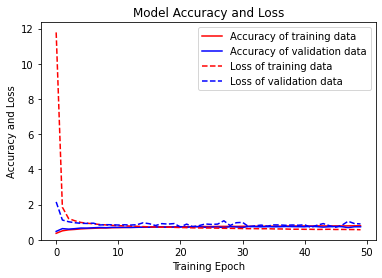

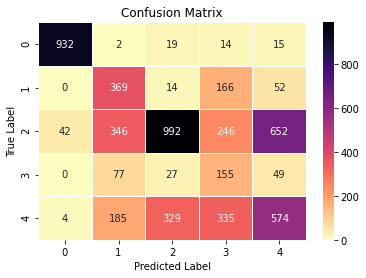

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
y_train shape (33375, 6)
(33375, 128, 12)
value shape (33375,)
value shape (33375,)
value shape (33375,)
(33375, 128, 12)
value shape (3483,)
value shape (3483,)
value shape (3483,)
(33375, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_10_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(33375, 128, 12, 1)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
209/209 [==============================] - 21s 78ms/step - loss: 7.5274 - accuracy: 0.4003 - val_loss: 1.1495 - val_accuracy: 0.5831
Epoch 2/50
209/209 [==============================] - 15s 71ms/step - loss: 1.2870 - accuracy: 0.5087 - val_loss: 1.0075 - val_accuracy: 0.5613
Epoch 3/50
209/209 [==============================] - 15s 71ms/step - loss: 1.0703 - accuracy: 0.5469 - val_loss: 0.9474 - val_accuracy: 0.6166
Epoch 4/50
209/209 [==============================] - 15s 71ms/step - loss: 1.0237 - accuracy: 0.5686 - val_loss: 0.9051 - val_accuracy: 0.6440
Epoch 5/50
209/209 [==============================] - 15s 70ms/step - loss: 0.9893 - accuracy: 0.5826 - val_loss: 0.9233 - val_accuracy: 0.6334
Epoch 6/50
209/209 [==============================] - 15s 71ms/step - loss: 0.9668 - accuracy: 0.5863 - val_loss: 0.9178 - val_accuracy: 0.6304
Epoch 7/50
209/209 [==============================] - 15s 70ms/step - loss: 0.9380 - accuracy: 0.5935 - val_loss: 0.9273 - val_accuracy:

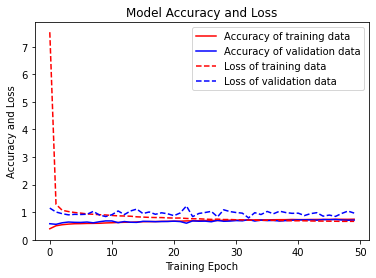

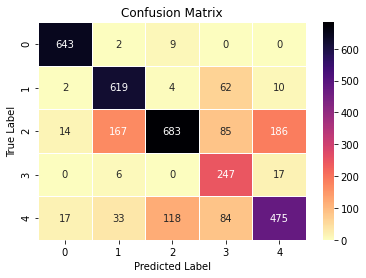

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
y_train shape (32352, 6)
(32352, 128, 12)
value shape (32352,)
value shape (32352,)
value shape (32352,)
(32352, 128, 12)
value shape (9158,)
value shape (9158,)
value shape (9158,)
(32352, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_20_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(32352, 128, 12, 1)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
203/203 [==============================] - 13s 49ms/step - loss: 9.8014 - accuracy: 0.3867 - val_loss: nan - val_accuracy: 0.6554
Epoch 2/50
203/203 [==============================] - 9s 46ms/step - loss: 1.4842 - accuracy: 0.5052 - val_loss: nan - val_accuracy: 0.6540
Epoch 3/50
203/203 [==============================] - 9s 46ms/step - loss: 1.1998 - accuracy: 0.5398 - val_loss: nan - val_accuracy: 0.6911
Epoch 4/50
203/203 [==============================] - 9s 46ms/step - loss: 1.1201 - accuracy: 0.5616 - val_loss: nan - val_accuracy: 0.6288
Epoch 5/50
203/203 [==============================] - 9s 46ms/step - loss: 1.0552 - accuracy: 0.5738 - val_loss: nan - val_accuracy: 0.6606
Epoch 6/50
203/203 [==============================] - 9s 46ms/step - loss: 1.0099 - accuracy: 0.5872 - val_loss: nan - val_accuracy: 0.6565
Epoch 7/50
203/203 [==============================] - 9s 46ms/step - loss: 0.9612 - accuracy: 0.6006 - val_loss: nan - val_accuracy: 0.7019
Epoch 8/50
203/203 

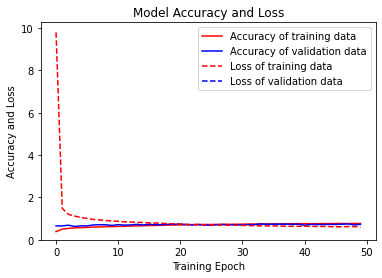

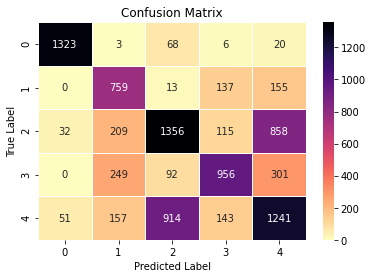

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
y_train shape (45204, 6)
(45204, 128, 12)
value shape (45204,)
value shape (45204,)
value shape (45204,)
(45204, 128, 12)
value shape (2310,)
value shape (2310,)
value shape (2310,)
(45204, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_30_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(45204, 128, 12, 1)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
283/283 [==============================] - 15s 48ms/step - loss: 8.9008 - accuracy: 0.4150 - val_loss: 1.4767 - val_accuracy: 0.5406
Epoch 2/50
283/283 [==============================] - 13s 46ms/step - loss: 1.1564 - accuracy: 0.5456 - val_loss: 0.9285 - val_accuracy: 0.6298
Epoch 3/50
283/283 [==============================] - 13s 46ms/step - loss: 1.0037 - accuracy: 0.5782 - val_loss: 0.9699 - val_accuracy: 0.6162
Epoch 4/50
283/283 [==============================] - 14s 49ms/step - loss: 0.9636 - accuracy: 0.5904 - val_loss: 1.0103 - val_accuracy: 0.6301
Epoch 5/50
283/283 [==============================] - 13s 45ms/step - loss: 0.9353 - accuracy: 0.6032 - val_loss: 0.9305 - val_accuracy: 0.6405
Epoch 6/50
283/283 [==============================] - 14s 48ms/step - loss: 0.9072 - accuracy: 0.6142 - val_loss: 0.9624 - val_accuracy: 0.6697
Epoch 7/50
283/283 [==============================] - 18s 65ms/step - loss: 0.8862 - accuracy: 0.6264 - val_loss: 0.8715 - val_accuracy:

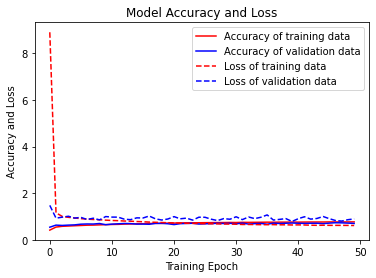

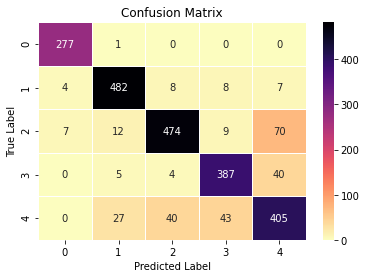

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
y_train shape (51198, 6)
(51198, 128, 12)
value shape (51198,)
value shape (51198,)
value shape (51198,)
(51198, 128, 12)
value shape (4333,)
value shape (4333,)
value shape (4333,)
(51198, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_40_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(51198, 128, 12, 1)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
320/320 [==============================] - 17s 48ms/step - loss: 4.0657 - accuracy: 0.4315 - val_loss: 0.9939 - val_accuracy: 0.5962
Epoch 2/50
320/320 [==============================] - 15s 46ms/step - loss: 1.0560 - accuracy: 0.5434 - val_loss: 0.9437 - val_accuracy: 0.6273
Epoch 3/50
320/320 [==============================] - 15s 45ms/step - loss: 0.9762 - accuracy: 0.5736 - val_loss: 1.0124 - val_accuracy: 0.6064
Epoch 4/50
320/320 [==============================] - 14s 45ms/step - loss: 0.9476 - accuracy: 0.5866 - val_loss: 1.0583 - val_accuracy: 0.6143
Epoch 5/50
320/320 [==============================] - 14s 45ms/step - loss: 0.9188 - accuracy: 0.6067 - val_loss: 1.0779 - val_accuracy: 0.6366
Epoch 6/50
320/320 [==============================] - 15s 46ms/step - loss: 0.8947 - accuracy: 0.6215 - val_loss: 0.9277 - val_accuracy: 0.6727
Epoch 7/50
320/320 [==============================] - 15s 48ms/step - loss: 0.8656 - accuracy: 0.6349 - val_loss: 1.0196 - val_accuracy:

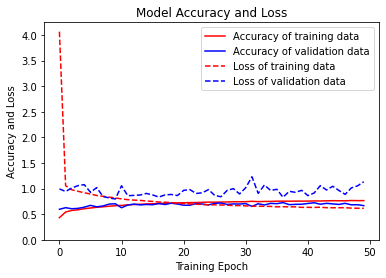

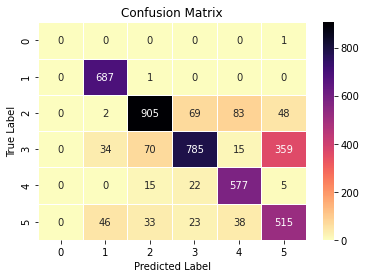

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
y_train shape (60814, 6)
(60814, 128, 12)
value shape (60814,)
value shape (60814,)
value shape (60814,)
(60814, 128, 12)
value shape (4940,)
value shape (4940,)
value shape (4940,)
(60814, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_50_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(60814, 128, 12, 1)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
381/381 [==============================] - 26s 65ms/step - loss: 6.1326 - accuracy: 0.4632 - val_loss: 1.0640 - val_accuracy: 0.5716
Epoch 2/50
381/381 [==============================] - 18s 47ms/step - loss: 1.0908 - accuracy: 0.5495 - val_loss: 0.9396 - val_accuracy: 0.5781
Epoch 3/50
381/381 [==============================] - 17s 46ms/step - loss: 0.9956 - accuracy: 0.5729 - val_loss: 0.8873 - val_accuracy: 0.6410
Epoch 4/50
381/381 [==============================] - 17s 46ms/step - loss: 0.9491 - accuracy: 0.5840 - val_loss: 0.9470 - val_accuracy: 0.6526
Epoch 5/50
381/381 [==============================] - 17s 46ms/step - loss: 0.9280 - accuracy: 0.5951 - val_loss: 0.9378 - val_accuracy: 0.6143
Epoch 6/50
381/381 [==============================] - 18s 46ms/step - loss: 0.9093 - accuracy: 0.6013 - val_loss: 0.8720 - val_accuracy: 0.6368
Epoch 7/50
381/381 [==============================] - 19s 50ms/step - loss: 0.8834 - accuracy: 0.6103 - val_loss: 0.9113 - val_accuracy:

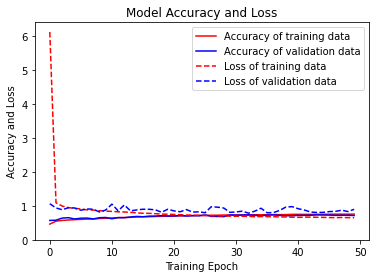

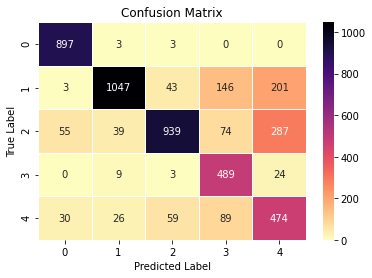

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
y_train shape (70911, 6)
(70911, 128, 12)
value shape (70911,)
value shape (70911,)
value shape (70911,)
(70911, 128, 12)
value shape (11297,)
value shape (11297,)
value shape (11297,)
(70911, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_60_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(70911, 128, 12, 1)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
444/444 [==============================] - 23s 48ms/step - loss: 4.9159 - accuracy: 0.4750 - val_loss: 0.9106 - val_accuracy: 0.6299
Epoch 2/50
444/444 [==============================] - 20s 46ms/step - loss: 0.9694 - accuracy: 0.5869 - val_loss: 0.8548 - val_accuracy: 0.6709
Epoch 3/50
444/444 [==============================] - 20s 46ms/step - loss: 0.8994 - accuracy: 0.6140 - val_loss: 0.7869 - val_accuracy: 0.7057
Epoch 4/50
444/444 [==============================] - 21s 47ms/step - loss: 0.8543 - accuracy: 0.6358 - val_loss: 0.7738 - val_accuracy: 0.7177
Epoch 5/50
444/444 [==============================] - 21s 47ms/step - loss: 0.8186 - accuracy: 0.6527 - val_loss: 0.7993 - val_accuracy: 0.7254
Epoch 6/50
444/444 [==============================] - 21s 48ms/step - loss: 0.7893 - accuracy: 0.6709 - val_loss: 0.7813 - val_accuracy: 0.7274
Epoch 7/50
444/444 [==============================] - 23s 53ms/step - loss: 0.7636 - accuracy: 0.6908 - val_loss: 0.7534 - val_accuracy:

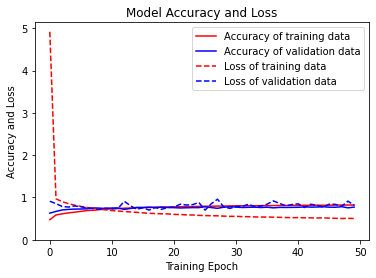

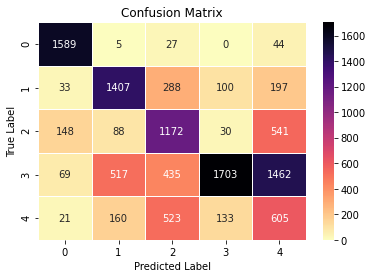

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
y_train shape (90153, 6)
(90153, 128, 12)
value shape (90153,)
value shape (90153,)
value shape (90153,)
(90153, 128, 12)
value shape (19435,)
value shape (19435,)
value shape (19435,)
(90153, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_70_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(90153, 128, 12, 1)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
564/564 [==============================] - 28s 47ms/step - loss: 4.8060 - accuracy: 0.4975 - val_loss: 0.9012 - val_accuracy: 0.6644
Epoch 2/50
564/564 [==============================] - 26s 46ms/step - loss: 0.9721 - accuracy: 0.6056 - val_loss: 0.7890 - val_accuracy: 0.7115
Epoch 3/50
564/564 [==============================] - 26s 46ms/step - loss: 0.8855 - accuracy: 0.6411 - val_loss: 0.7409 - val_accuracy: 0.7558
Epoch 4/50
564/564 [==============================] - 26s 46ms/step - loss: 0.8385 - accuracy: 0.6597 - val_loss: 0.7429 - val_accuracy: 0.7491
Epoch 5/50
564/564 [==============================] - 33s 58ms/step - loss: 0.7997 - accuracy: 0.6797 - val_loss: 0.7267 - val_accuracy: 0.7452
Epoch 6/50
564/564 [==============================] - 31s 56ms/step - loss: 0.7684 - accuracy: 0.7019 - val_loss: 0.6998 - val_accuracy: 0.7648
Epoch 7/50
564/564 [==============================] - 26s 46ms/step - loss: 0.7399 - accuracy: 0.7127 - val_loss: 0.7442 - val_accuracy:

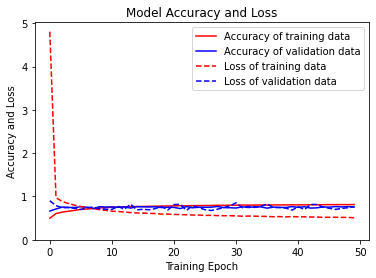

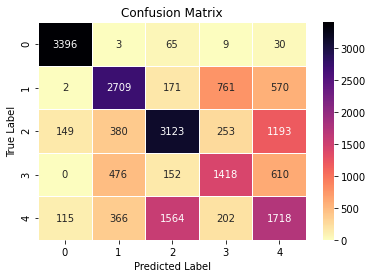

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
y_train shape (140200, 6)
(140200, 128, 12)
value shape (140200,)
value shape (140200,)
value shape (140200,)
(140200, 128, 12)
value shape (24175,)
value shape (24175,)
value shape (24175,)
(140200, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_80_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(140200, 128, 12, 1)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
877/877 [==============================] - 43s 47ms/step - loss: 2.8740 - accuracy: 0.4989 - val_loss: 0.8297 - val_accuracy: 0.7015
Epoch 2/50
877/877 [==============================] - 40s 46ms/step - loss: 0.9772 - accuracy: 0.5874 - val_loss: 0.8058 - val_accuracy: 0.7339
Epoch 3/50
877/877 [==============================] - 41s 46ms/step - loss: 0.8910 - accuracy: 0.6310 - val_loss: 0.7925 - val_accuracy: 0.7410
Epoch 4/50
877/877 [==============================] - 45s 51ms/step - loss: 0.8324 - accuracy: 0.6674 - val_loss: 0.8903 - val_accuracy: 0.7087
Epoch 5/50
877/877 [==============================] - 60s 68ms/step - loss: 0.7936 - accuracy: 0.6871 - val_loss: 0.8771 - val_accuracy: 0.7272
Epoch 6/50
877/877 [==============================] - 58s 66ms/step - loss: 0.7549 - accuracy: 0.7071 - val_loss: 0.8143 - val_accuracy: 0.7455
Epoch 7/50
877/877 [==============================] - 40s 46ms/step - loss: 0.7313 - accuracy: 0.7189 - val_loss: 0.7791 - val_accuracy:

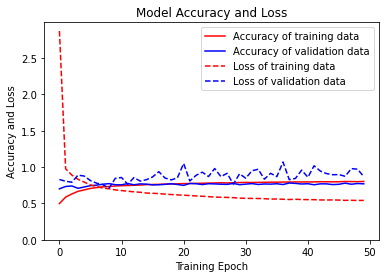

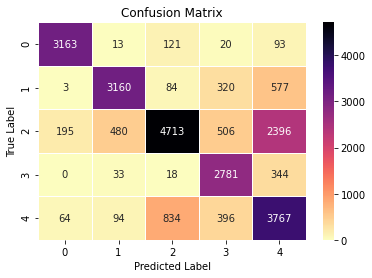

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
y_train shape (271626, 6)
(271626, 128, 12)
value shape (271626,)
value shape (271626,)
value shape (271626,)
(271626, 128, 12)
value shape (57099,)
value shape (57099,)
value shape (57099,)
(271626, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_90_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(271626, 128, 12, 1)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
1698/1698 [==============================] - 83s 46ms/step - loss: 2.1764 - accuracy: 0.5850 - val_loss: 0.9364 - val_accuracy: 0.6668
Epoch 2/50
1698/1698 [==============================] - 80s 47ms/step - loss: 0.7620 - accuracy: 0.6961 - val_loss: 0.8674 - val_accuracy: 0.7312
Epoch 3/50
1698/1698 [==============================] - 91s 54ms/step - loss: 0.6752 - accuracy: 0.7455 - val_loss: 0.8457 - val_accuracy: 0.7358
Epoch 4/50
1698/1698 [==============================] - 84s 50ms/step - loss: 0.6178 - accuracy: 0.7782 - val_loss: 0.8133 - val_accuracy: 0.7651
Epoch 5/50
1698/1698 [==============================] - 96s 56ms/step - loss: 0.5814 - accuracy: 0.7940 - val_loss: 0.9056 - val_accuracy: 0.7558
Epoch 6/50
1698/1698 [==============================] - 88s 52ms/step - loss: 0.5598 - accuracy: 0.8038 - val_loss: 0.8852 - val_accuracy: 0.7435
Epoch 7/50
1698/1698 [==============================] - 112s 66ms/step - loss: 0.5434 - accuracy: 0.8108 - val_loss: 0.8572 

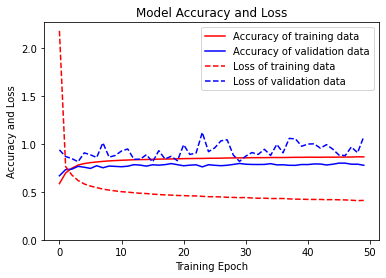

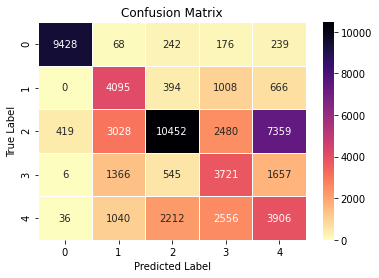

In [6]:
overlapPercents = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# overlapPercents = [0]
# exclude_subjects = ['ddAeJA42PXvwthbW', 'nan', 'LLZjAPTyj7muHsEf',
#                     'MMuX9YIh4NTbLZLM', 'cbOZWnI7s1y8oLD4', 'PE8D53oX060qLbdX', 'xYdtS1F8tDyjEIgN', 'sUZBISq61Y7I5tqQ']
exclude_subjects = ['ddAeJA42PXvwthbW', 'nan', '0DXZFsYOfgqsYe0Z',
                    '0UXFxu10k0En1vDK',
                    'KNmC3LADpLyH5qJA',
                    'YbJVcb4vFFjKKlfe',
                    'ewpnQDEzR8hTqPRY', ]
for OVERLAP_PERCENT in overlapPercents:
    gpus = tf.config.list_logical_devices('GPU')
    strategy = tf.distribute.MirroredStrategy(gpus)
    with strategy.scope():
        X, y, subjects = get_overlap_data_all_sessions(OVERLAP_PERCENT)
        # REMOVE UNWANTED SUBJECTS
        indexes = np.where(subjects == exclude_subjects)
        X = np.delete(X, indexes[0], axis=0)
        y = np.delete(y, indexes[0], axis=0)
        subjects = np.delete(subjects, indexes[0], axis=0)
        # END REMOVE UNWANTED SUBJECTS

        # AUGMENT DATA
        resultant_acc = compute_resultant_acceleration(X)
        resultant_gyro = compute_resultant_gyro(X)
        resultant_angle = compute_resultant_angle(X)
        resultant_acc = resultant_acc.reshape(
            resultant_acc.shape[0], resultant_acc.shape[1], 1)
        resultant_gyro = resultant_gyro.reshape(
            resultant_gyro.shape[0], resultant_gyro.shape[1], 1)
        resultant_angle = resultant_angle.reshape(
            resultant_angle.shape[0], resultant_angle.shape[1], 1)
        X = np.concatenate((X, resultant_acc), axis=2)
        X = np.concatenate((X, resultant_gyro), axis=2)
        X = np.concatenate((X, resultant_angle), axis=2)
        # AUGMENT DATA END

        # print('UNIQUE subjects:', np.unique(subjects))
        X_train, X_test, y_train, y_test, y_train_non_encoded, y_test_non_encoded = split_test_train_by_subjects(
            X, y, subjects, train_percent=0.9)
        print('y_train shape', y_train.shape)
        X_train_stats = get_statistic_feature_all_channels(X_train)
        X_test_stats = get_statistic_feature_all_channels(X_test)
        print(X_train_stats.shape)

        model, history = train_model_with_stats(
            X_train, y_train, X_test, y_test, X_train_stats, X_test_stats, overlap_percent=OVERLAP_PERCENT, batch_size=128, epochs=50)

        save_history(history, OVERLAP_PERCENT)
        evaluation_history = model.evaluate(
            [X_test, X_test_stats], y_test, batch_size=128, verbose=1)
        save_test_history(evaluation_history, OVERLAP_PERCENT)
        save_accuracy_loss_figure(history, OVERLAP_PERCENT)
        validations, predictions = compute_validations_predictions_with_stats(
            model, X_test, y_test, X_test_stats)
        save_confusion_matrix_figure(
            validations, predictions, OVERLAP_PERCENT, sns)


In [7]:
def compute_validations_predictions_with_stats(model, X_test, y_test, X_test_stats):
    y_pred_test = model.predict([X_test, X_test_stats])
    max_y_pred_test = np.argmax(y_pred_test, axis=1)
    max_y_test = np.argmax(y_test, axis=1)

    return max_y_pred_test, max_y_test

In [8]:
validations, predictions = compute_validations_predictions_with_stats(
            model, X_test, y_test, X_test_stats)

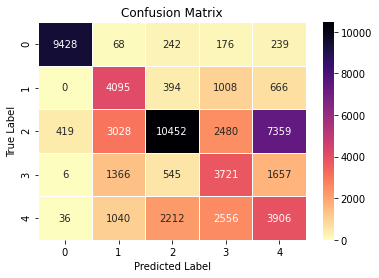

In [9]:
save_confusion_matrix_figure(
            validations, predictions, OVERLAP_PERCENT, sns)